In [4]:
# --------------Imports-----------------
# NumPy is a Python library used for working with arrays
import numpy as np

# För att kunna plotta datan
import matplotlib.pyplot as plt

import random

from sympy import expand, symbols

from sklearn.dummy import check_random_state

from gplearn.genetic import SymbolicRegressor

# Gör det möjligt att plotta trädet
import graphviz

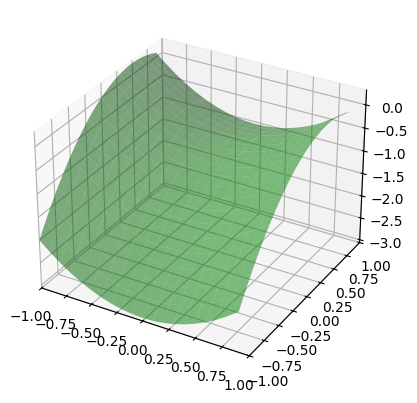

In [2]:
# --------------Create synthetic data based on eq: y = X_0^2 - X_1^2 + X_1 + 1  -----------------
x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
#plt.show()

rng = check_random_state(0)

In [5]:
# --------------Make a traning and testing set in the plane-----------------

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [ ]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

est_gp.fit(X_train, y_train)

print(est_gp._program)

In [ ]:
# --------------Playing around with sympy to expand the expression -----------------
# Define symbolic variables
X0, X1 = symbols('X0 X1')

# Define the expression using standard operators
expression = (-0.999 + X1) - ((X1 - X0) * (X0 + X1))

# Expand the expression
expanded_expression = expand(expression)

print(expanded_expression)


In [ ]:
# Generate the DOT data (assuming est_gp is defined and has _program.export_graphviz())
dot_data = est_gp._program.export_graphviz()
# Create a Graphviz Source object
graph = graphviz.Source(dot_data)

graph.view()  # Opens the graph in the default viewer

print(est_gp._program.parents)

idx = est_gp._program.parents['donor_idx']
fade_nodes = est_gp._program.parents['donor_nodes']
dot_data = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = graphviz.Source(dot_data)
graph.view()